In [125]:
import random
from matplotlib import pyplot as plt 
import statistics

# Constants
m = 64
T = 1000

In [126]:
def d_choice(d):
    return [random.choice(range(m)) for _ in range(d)]

def one_choice():
    return d_choice(1)

def two_choice():
    return d_choice(2)

def beta_choice(beta):
    r = random.uniform(0, 1)
    if (r < beta):
        return one_choice()
    else:
        return two_choice()

def beta_one_quarter():
    return beta_choice(0.25)

def beta_two_quarters():
    return beta_choice(0.50)

def beta_three_quarters():
    return beta_choice(0.75)

In [140]:
def select_lowest_load(candidates, load):
    selected = candidates[0]
    for candidate in candidates:
        if (load[candidate] < load[selected]):
            selected = candidate
    return selected

def select_by_median(candidates, load):
    med = statistics.median(load)
    selected = candidates[0]
    for candidate in candidates:
        if (load[candidate] < med):
            selected = candidate
    return selected

def select_by_two_queries(candidates, load):
    med = statistics.median(load)
    heavy_loaded_med = statistics.quantiles(load, n=4)[2]
    light_loaded_med = statistics.quantiles(load, n=4)[0]
    
    heavy_loaded = []
    light_loaded = []
    for candidate in candidates:
        if (load[candidate] < med):
            light_loaded.append(candidate)
        else:
            heavy_loaded.append(candidate)

    selected = candidates[0]
    if len(light_loaded) > 0:
        selected = light_loaded[0]
        for candidate in light_loaded:
            if (load[candidate] < light_loaded_med):
                selected = candidate

    else:
        selected = heavy_loaded[0]
        for candidate in heavy_loaded:
            if (load[candidate] < heavy_loaded_med):
                selected = candidate
            
    return selected

In [128]:
def experiment(select_bin, select_candidates):
    G = [0 for _ in range(m*m + 1)]
    for _ in range(T):
        load = [0 for _ in range(m)]
        for n in range(1, m*m + 1):
            candidates = select_candidates()
            selected = select_bin(candidates, load)
            load[selected] += 1
            G[n] += max(load) - n/m

    G = [x/T for x in G]
    return G
            
#print(experiment(select_lowest_load, one_choice))

In [129]:
result_one_choice = experiment(select_lowest_load, one_choice)
result_two_choice = experiment(select_lowest_load, two_choice)
result_beta_one_quarter_choice = experiment(select_lowest_load, beta_one_quarter)
result_beta_two_quarters_choice = experiment(select_lowest_load, beta_two_quarters)
result_beta_three_quarters_choice = experiment(select_lowest_load, beta_three_quarters)

In [130]:
x = [i for i in range(1, m*m + 1)]

y_one_choice = [result_one_choice[i] for i in x]
y_two_choice = [result_two_choice[i] for i in x]
y_beta_one_quarter_choice = [result_beta_one_quarter_choice[i] for i in x]
y_beta_two_quarters_choice = [result_beta_two_quarters_choice[i] for i in x]
y_beta_three_quarters_choice = [result_beta_three_quarters_choice[i] for i in x]

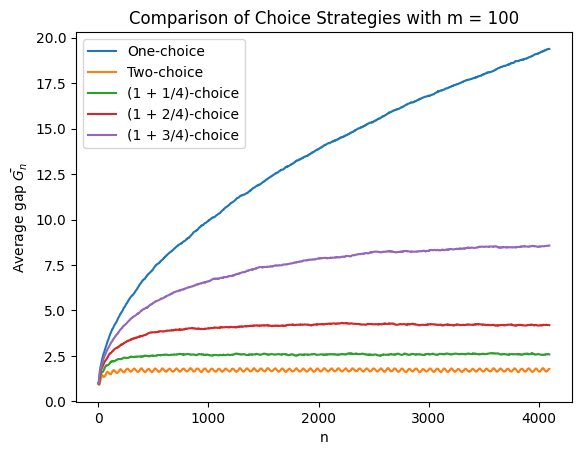

In [131]:
# Plot the data
plt.plot(x, y_one_choice, label="One-choice")
plt.plot(x, y_two_choice, label="Two-choice")
plt.plot(x, y_beta_one_quarter_choice, label="(1 + 1/4)-choice")
plt.plot(x, y_beta_two_quarters_choice, label="(1 + 2/4)-choice")
plt.plot(x, y_beta_three_quarters_choice, label="(1 + 3/4)-choice")

# Add the legend
plt.legend()

# Add a title
plt.title("Comparison of Choice Strategies with m = 100")

# Add labels to the axes
plt.xlabel("n")
plt.ylabel("Average gap " + r'$\bar{G_n}$')

# Show the plot
plt.show()

In [132]:
def batched_experiment(select_candidates, select_bin, batch_size):
    l = m*m//batch_size + ((m*m)%batch_size > 0)
    G = [0 for _ in range(l + 1)]
    for _ in range(T):
        load = [0 for _ in range(m)]
        for i in range(1, l + 1):
            n = i*batch_size
            candidates = select_candidates()
            selected = select_bin(candidates, load)
            load[selected] += batch_size
            G[i] += max(load) - n/m

    G = [x/T for x in G]
    return G

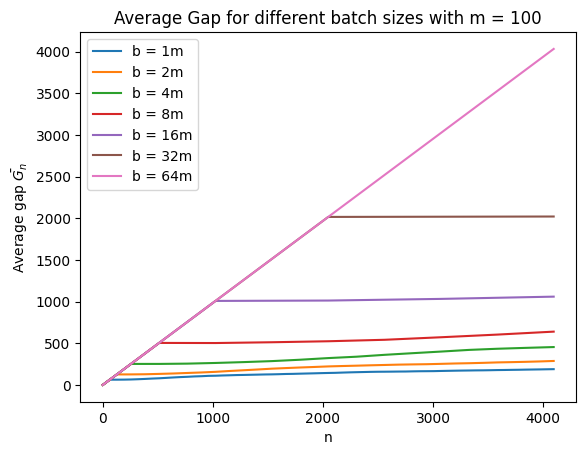

In [133]:
# Showing the results for different values of b
for k in [2**i for i in range(7)]:
    b = k*m
    l = m*m//b + ((m*m)%b > 0)
    
    x_b = [b*i for i in range(l + 1)]
    y_b = batched_experiment(one_choice, select_lowest_load, b)
    
    # Plot the data
    plt.plot(x_b, y_b, label="b = " + str(k) + "m")
    
    # Add the legend
    plt.legend()
    
    # Add a title
    plt.title("Average Gap for different batch sizes with m = 100")
    
    # Add labels to the axes
    plt.xlabel("n")
    plt.ylabel("Average gap " + r'$\bar{G_n}$')

# Show the plot
plt.show()

In [134]:
result_one_choice_by_median = experiment(select_by_median, one_choice)
result_two_choice_by_median = experiment(select_by_median, two_choice)
result_beta_one_quarter_choice_by_median = experiment(select_by_median, beta_one_quarter)
result_beta_two_quarters_choice_by_median = experiment(select_by_median, beta_two_quarters)
result_beta_three_quarters_choice_by_median = experiment(select_by_median, beta_three_quarters)

In [137]:
x_by_median = [i for i in range(1, m*m + 1)]

y_one_choice_by_median = [result_one_choice_by_median[i] for i in x]
y_two_choice_by_median = [result_two_choice_by_median[i] for i in x]
y_beta_one_quarter_choice_by_median = [result_beta_one_quarter_choice_by_median[i] for i in x]
y_beta_two_quarters_choice_by_median = [result_beta_two_quarters_choice_by_median[i] for i in x]
y_beta_three_quarters_choice_by_median = [result_beta_three_quarters_choice_by_median[i] for i in x]

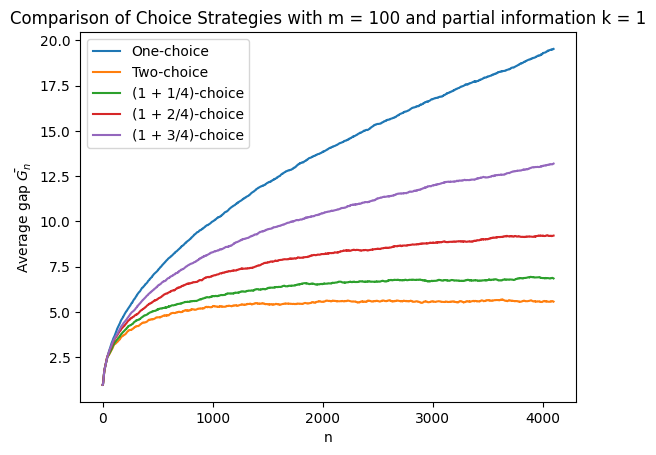

In [138]:
plt.plot(x_by_median, y_one_choice_by_median, label="One-choice")
plt.plot(x_by_median, y_two_choice_by_median, label="Two-choice")
plt.plot(x_by_median, y_beta_one_quarter_choice_by_median, label="(1 + 1/4)-choice")
plt.plot(x_by_median, y_beta_two_quarters_choice_by_median, label="(1 + 2/4)-choice")
plt.plot(x_by_median, y_beta_three_quarters_choice_by_median, label="(1 + 3/4)-choice")

plt.legend()

plt.title("Comparison of Choice Strategies with m = 100 and partial information k = 1")

plt.xlabel("n")
plt.ylabel("Average gap " + r'$\bar{G_n}$')

plt.show()

In [141]:
result_one_choice_by_two_queries = experiment(select_by_two_queries, one_choice)
result_two_choice_by_two_queries = experiment(select_by_two_queries, two_choice)
result_beta_one_quarter_choice_by_two_queries = experiment(select_by_two_queries, beta_one_quarter)
result_beta_two_quarters_choice_by_two_queries = experiment(select_by_two_queries, beta_two_quarters)
result_beta_three_quarters_choice_by_two_queries = experiment(select_by_two_queries, beta_three_quarters)

In [142]:
x_by_two_queries = [i for i in range(1, m*m + 1)]

y_one_choice_by_two_queries = [result_one_choice_by_two_queries[i] for i in x]
y_two_choice_by_two_queries = [result_two_choice_by_two_queries[i] for i in x]
y_beta_one_quarter_choice_by_two_queries = [result_beta_one_quarter_choice_by_two_queries[i] for i in x]
y_beta_two_quarters_choice_by_two_queries = [result_beta_two_quarters_choice_by_two_queries[i] for i in x]
y_beta_three_quarters_choice_by_two_queries = [result_beta_three_quarters_choice_by_two_queries[i] for i in x]

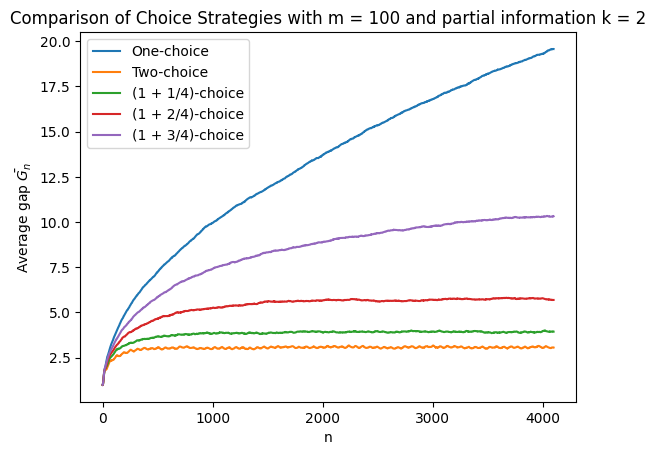

In [143]:
plt.plot(x_by_two_queries, y_one_choice_by_two_queries, label="One-choice")
plt.plot(x_by_two_queries, y_two_choice_by_two_queries, label="Two-choice")
plt.plot(x_by_two_queries, y_beta_one_quarter_choice_by_two_queries, label="(1 + 1/4)-choice")
plt.plot(x_by_two_queries, y_beta_two_quarters_choice_by_two_queries, label="(1 + 2/4)-choice")
plt.plot(x_by_two_queries, y_beta_three_quarters_choice_by_two_queries, label="(1 + 3/4)-choice")

plt.legend()

plt.title("Comparison of Choice Strategies with m = 100 and partial information k = 2")

plt.xlabel("n")
plt.ylabel("Average gap " + r'$\bar{G_n}$')

plt.show()

In [ ]:
# Uncomment the desired lines to run the experiment

# bin_selection_method = 
# options: one_choice, two_choice, etc.

# candidate_bins_selection_method = 
# options: select_lowest_load, etc.

# bath_size = 

# experiment_run = 
# options: expertiment, batched_experiment, etc.

# Run this to get the results of the experiment run
# exp_result = experiment_run(bin_selection_method, candidate_bins_selection_method)

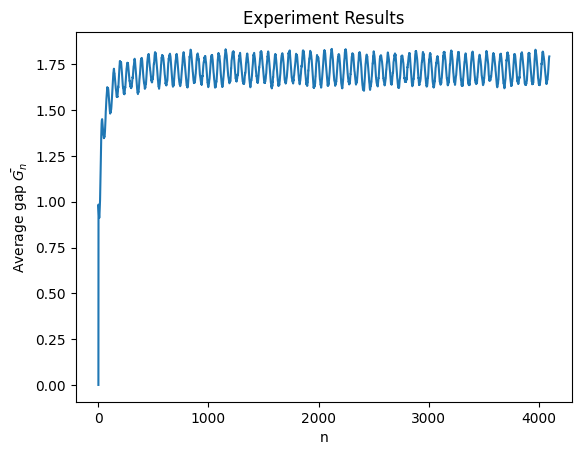

In [155]:
# Uncomment the desired lines to configure and run the experiment

# 1. Choose the bin selection method
bin_selection_method = select_lowest_load  # Options: select_lowest_load, select_by_median, select_by_two_queries

# 2. Choose the candidate bin selection method
candidate_bins_selection_method = two_choice  # Options: one_choice, two_choice, beta_one_quarter, beta_two_quarters, beta_three_quarters

# 3. (Optional) Set the batch size for batched experiments
batch_size = m  # Set the batch size (e.g., m, 2*m, etc.)

# 4. Choose the experiment type
experiment_type = experiment  # Options: experiment, batched_experiment

# If using batched_experiment, you need to provide a batch_size
if experiment_type == batched_experiment:
    # Run the batched experiment with the selected configuration
    exp_result = batched_experiment(candidate_bins_selection_method, bin_selection_method, batch_size)
    l = m*m//batch_size + ((m*m)%batch_size > 0)
    x = [batch_size*i for i in range(l + 1)]
else:
    # Run the standard experiment
    exp_result = experiment(bin_selection_method, candidate_bins_selection_method)
    x = range(m*m + 1)

# 5. Plot the results
# x-values (range of experiment steps)


# Plot the experiment result
plt.plot(x, exp_result)

# Add title and labels
plt.title("Experiment Results")
plt.xlabel("n")
plt.ylabel("Average gap " + r'$\bar{G_n}$')

# Show the plot
plt.show()